In [18]:
import sys
sys.path.append("..")

#import the jaxified ELR model
from core import ELR, utils

import jax.numpy as jnp
import jax
import numpy as np
import matplotlib.pyplot as plt
from jax import grad, jit, vmap, jacfwd, jacrev

In [19]:
from scipy.special import j1
mas2rad = jnp.pi / 180.0 / 3600.0/ 1000.0

def airy(w, lam, diam):
    '''Airy function for a circular aperture, evaluated on baselines uv (m) with diameter diam (mas) at wavelength lam (m)'''
    
    r = w/lam

    d = diam*mas2rad

    return 2 * j1(jnp.pi * r * d) / (jnp.pi * r * d)

In [80]:
u, v = jnp.linspace(-330,330,64), jnp.linspace(-330,330,64)
uu, vv = np.meshgrid(np.linspace(-330,330,64),np.linspace(-330,330,64))
uvgrid = np.vstack((uu.flatten(),vv.flatten())).T

rr = ELR.ELR_Model(31,uvgrid,1e-6)

In [111]:
uvgrid.shape

(4096, 2)

In [120]:
u = np.linspace(0,10,10)
v = np.linspace(11,20,10)
uv = np.vstack([u,v]).T
uv.shape

(10, 2)

In [121]:
ft = rr(0,1/2,jnp.pi/4,0)

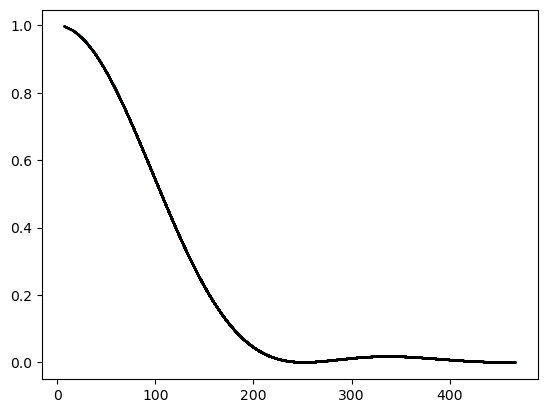

In [124]:
from scipy.special import j0, j1, jn
mas2rad = jnp.pi / 180.0 / 3600.0/ 1000.0

def diam_scipy(d, uv):
    r = jnp.sqrt(uv[:,0]**2+uv[:,1]**2)
    diam = d*mas2rad
    x = diam*r*jnp.pi
    return 2*(j1(x)/x)
    
wgrid = np.sqrt(uvgrid[:,0]**2 + uvgrid[:,1]**2)
v2_anal = diam_scipy(1, uvgrid/1e-6)**2
v2, phase = jnp.abs(ft)**2, jnp.angle(ft)
plt.plot(wgrid,v2_anal,label='Analytic Model')
plt.plot(wgrid,v2,'k-', label='ELR Model')


In [83]:
from scipy.special import j0, j1, jn
mas2rad = jnp.pi / 180.0 / 3600.0/ 1000.0


def grad_scipy(d, uv):
    """Computes the gradient of the visibility function wrt. diameter"""
    r = jnp.sqrt(uv[:,0]**2+uv[:,1]**2)
    deriv = (d*j0(jnp.pi*mas2rad*r*d)
             - 2*j1(jnp.pi*mas2rad*r*d)/(jnp.pi*mas2rad*r) 
             - d*jn(2,jnp.pi*mas2rad*r*d))/(d**2)
    return deriv

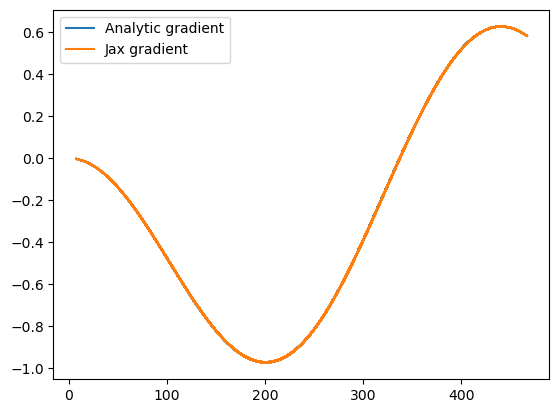

In [92]:
plt.plot(wgrid,grad_scipy(1,uvgrid/1e-6),label='Analytic gradient')

@jit
def grad_func(r_eq):
    return rr(0.0,r_eq, 0.0,0.0)
    
plt.plot(wgrid,jacfwd(grad_func)(0.5)/2.0, label='Jax gradient')

plt.legend()

In [107]:
mins, mids, maxs = [], [], []
for N in np.arange(11,101,step=1):
    rr = ELR.ELR_Model(N,uvgrid,1e-6)
    def grad_func(r_eq):
        return rr(0.0,r_eq, 0.0,0.0)
    res = jacfwd(grad_func)(0.5)/2.0 - grad_scipy(1,uvgrid/1e-6)
    mins.append(jnp.min(res))
    maxs.append(jnp.max(res))
    mids.append(jnp.mean(res))

Text(0, 0.5, 'Max Error')

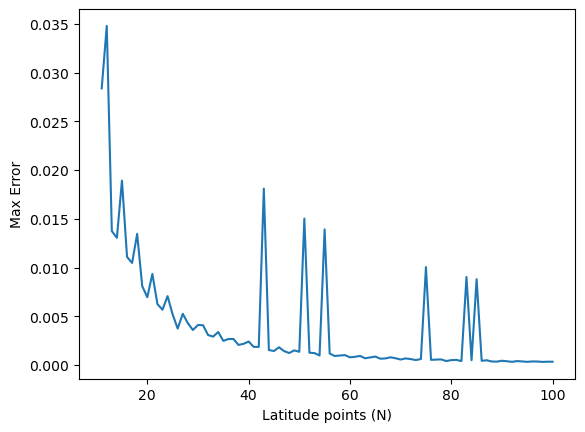

In [108]:
plt.plot(np.arange(11,101,step=1), np.abs(np.array(maxs)))
plt.xlabel("Latitude points (N)")
plt.ylabel("Max Error")

In [109]:
np.arange(11,101,step=1)[np.argsort(np.abs(np.array(maxs)))]

array([ 98,  95,  92, 100,  99,  89,  97,  88,  94,  96,  91,  82,  93,
        79,  86,  90,  87,  84,  80,  73,  81,  76,  77,  70,  78,  72,
        74,  66,  67,  71,  63,  69,  64,  60,  68,  61,  65,  57,  62,
        58,  54,  59,  56,  53,  48,  52,  50,  47,  45,  49,  44,  46,
        42,  41,  38,  39,  40,  35,  36,  37,  33,  32,  34,  29,  26,
        31,  30,  28,  25,  27,  23,  22,  20,  24,  19,  85,  83,  21,
        75,  17,  16,  14,  18,  13,  55,  51,  43,  15,  11,  12])

In [91]:
maxs

[Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
 Array(0.00343865+0.00127818j, dtype=complex128),
